# Import Data & Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [32]:
df.drop('CustomerID', axis=1, inplace=True)

<AxesSubplot:>

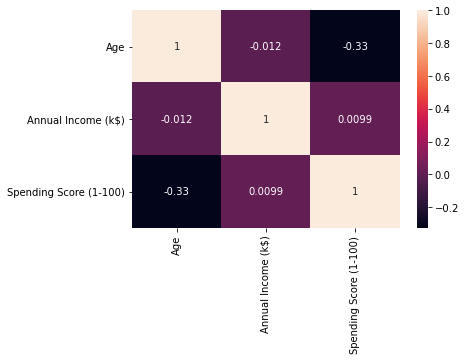

In [33]:
sns.heatmap(df.corr(), annot=True)

In [34]:
# rename
df.rename(columns={'Spending Score (1-100)': 'Score', 'Annual Income (k$)': 'Income'}, inplace=True)
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [37]:
# df.to_csv('newKmeanCluster.csv')

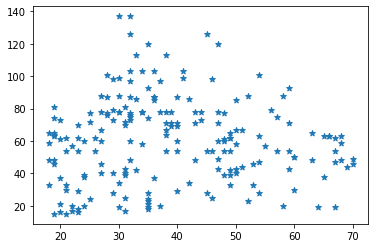

In [38]:
# Visualization

plt.scatter(df['Age'], df['Income'], marker='*')

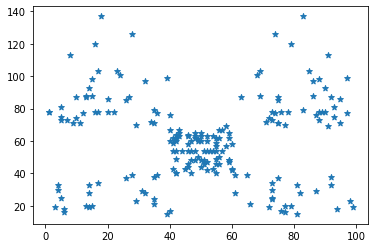

In [39]:
plt.scatter(df['Score'], df['Income'], marker='*') 

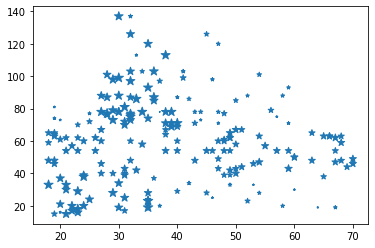

In [40]:
plt.scatter(df['Age'], df['Income'], df['Score'], marker='*')

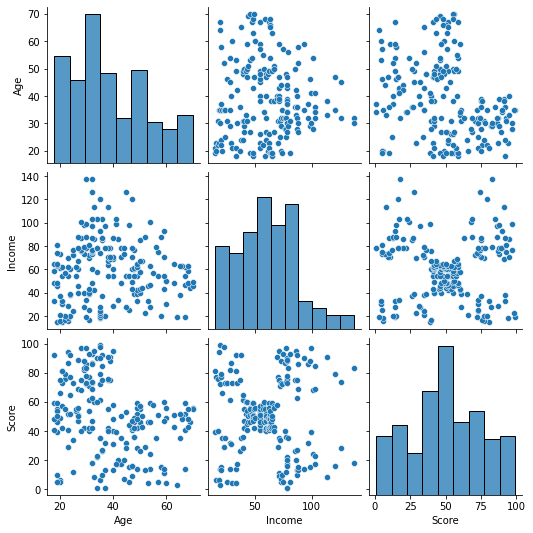

In [41]:
# Pairplot
sns.pairplot(df[['Age', 'Income', 'Score']])

# Optimum Number of Clusters

In [42]:
from sklearn.cluster import KMeans
wcss = []
cluster_range = range(1, 16)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k) # default = 8
    kmeans.fit(df[['Gender', 'Age', 'Income', 'Score']])
    wcss.append(kmeans.inertia_) # How well a dataset is clusterd by K-Means

In [43]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51132.70321257687,
 44359.6346411483,
 40678.976904985815,
 37938.619549113915,
 35042.76029639479,
 32240.055072463776,
 29849.229340822003,
 28424.86563923548,
 26158.972317010477]

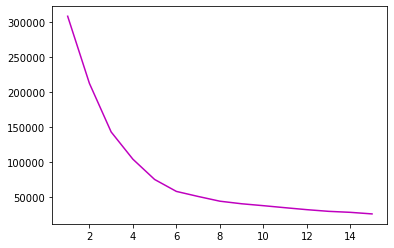

In [44]:
plt.plot(cluster_range, wcss, color='m')

In [45]:
!pip install kneed # for plotting 5

In [46]:
from kneed import KneeLocator
kn = KneeLocator(cluster_range, wcss, curve='convex', direction = 'decreasing')

print('Optimum number of cluster: ',kn.knee)

Optimum number of cluster:  5


# After Tuning

In [47]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=5)

df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [48]:
df['new_cluster'] = kmeans.fit_predict(df[['Gender', 'Age', 'Income', 'Score']]) # fit & predict

df.head()

,Gender,Age,Income,Score,new_cluster
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


In [49]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025]])

# Visualization

In [50]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1] 
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

In [51]:
df.shape

(200, 5)

In [52]:
df0.shape

(23, 5)

In [53]:
df1.shape

(39, 5)

In [54]:
df2.shape

(36, 5)

In [55]:
df3.shape

(23, 5)

# centroids

In [56]:
centers = kmeans.cluster_centers_ 
centers

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025]])